## Equity Portfolio Management

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Load the data of 10 stocks (Universe)

In [2]:
rm(list = ls())
universe = c('IBM.csv','MSFT.csv','GOOG.csv','AAPL.csv','AMZN.csv','META.csv','NFLX.csv','TSLA.csv','ORCL.csv','SAP.csv') # Names of the csv files
uni_names = c('IBM','MSFT','GOOG','AAPL','AMZN','META','NFLX','TSLA','ORCL','SAP') # Names of the csv files

data.all = list()                                                          # Create a list that will contain all the dataframes
for(i in seq_len(length(universe))){                                       # For loop to read the csv files and put in data.all
    data.all[[uni_names[i]]] = read.csv(paste(folder,sep='/',universe[i]))
}

str(data.all)                                                                 # See all the data frames

List of 10
 $ IBM :'data.frame':	250 obs. of  7 variables:
  ..$ Date     : chr [1:250] "02-01-2018" "03-01-2018" "04-01-2018" "05-01-2018" ...
  ..$ Open     : num [1:250] 148 150 153 155 156 ...
  ..$ High     : num [1:250] 148 153 155 156 157 ...
  ..$ Low      : num [1:250] 147 149 152 154 155 ...
  ..$ Close    : num [1:250] 147 152 155 155 156 ...
  ..$ Adj.Close: num [1:250] 117 121 123 124 124 ...
  ..$ Volume   : int [1:250] 4395815 9875914 7903785 5434807 5478425 4541523 4366109 3969047 5263367 8152733 ...
 $ MSFT:'data.frame':	250 obs. of  7 variables:
  ..$ Date     : chr [1:250] "02-01-2018" "03-01-2018" "04-01-2018" "05-01-2018" ...
  ..$ Open     : num [1:250] 86.1 86.1 86.6 87.7 88.2 ...
  ..$ High     : num [1:250] 86.3 86.5 87.7 88.4 88.6 ...
  ..$ Low      : num [1:250] 85.5 86 86.6 87.4 87.6 ...
  ..$ Close    : num [1:250] 85.9 86.3 87.1 88.2 88.3 ...
  ..$ Adj.Close: num [1:250] 81.2 81.5 82.3 83.3 83.4 ...
  ..$ Volume   : int [1:250] 22483800 26061400 21912000 2

### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.


In [3]:
data.universe = data.frame(Date = data.all[[1]]$Date)    # Select the first column as date
name_data = 'Date'                                       # will be used to name the cols of data frame
p = 2                                                    # couter for the columns (stars with 2 as 1 is the date)
for (i in seq_len(length(universe))){                    # for loop on the stocks
    data.universe[[p]] = data.all[[uni_names[i]]]$Close         # get the close price
    data.universe[[p+1]] = data.all[[uni_names[i]]]$Adj.Close   # Get the Adj.Close price
    p = p+2                                                     # increase counter by 2 as we added 2 new colums
    name_data = c(name_data,paste(uni_names[i],"Close",sep='.'),paste(uni_names[i],"Adj.Close",sep='.')) # Update the Name
}
names(data.universe) = name_data            # Name the columns

head(data.universe)
tail(data.universe)


,Date,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,AAPL.Adj.Close,AMZN.Close,⋯,META.Close,META.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,147.4665,117.4202,85.95,81.16849,53.2500,53.2500,43.0650,41.01843,59.4505,⋯,181.42,181.42,201.07,201.07,21.36867,21.36867,46.63,43.14545,112.39,102.8927
2,03-01-2018,151.5201,120.6479,86.35,81.54625,54.1240,54.1240,43.0575,41.01128,60.2100,⋯,184.67,184.67,205.05,205.05,21.15000,21.15000,47.71,44.14474,113.31,103.7350
3,04-01-2018,154.5889,123.0914,87.11,82.26399,54.3200,54.3200,43.2575,41.20177,60.4795,⋯,184.33,184.33,205.63,205.63,20.97467,20.97467,48.18,44.57962,115.05,105.3279
4,05-01-2018,155.3442,123.6928,88.19,83.28388,55.1115,55.1115,43.7500,41.67087,61.4570,⋯,186.85,186.85,209.99,209.99,21.10533,21.10533,48.47,44.84794,116.33,106.4998
5,08-01-2018,156.2811,124.4388,88.28,83.36888,55.3470,55.3470,43.5875,41.51610,62.3435,⋯,188.28,188.28,212.05,212.05,22.42733,22.42733,48.98,45.31984,114.80,105.0991
6,09-01-2018,156.6252,124.7128,88.22,83.31222,55.3130,55.3130,43.5825,41.51133,62.6350,⋯,187.87,187.87,209.31,209.31,22.24600,22.24600,49.06,45.57063,114.16,104.5132


,Date,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,GOOG.Close,GOOG.Adj.Close,AAPL.Close,AAPL.Adj.Close,AMZN.Close,⋯,META.Close,META.Adj.Close,NFLX.Close,NFLX.Adj.Close,TSLA.Close,TSLA.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,20-12-2018,108.0497,89.92610,101.51,97.52238,50.4705,50.4705,39.2075,37.90490,73.0415,⋯,133.40,133.40,260.58,260.58,21.02533,21.02533,46.24,43.47253,100.10,93.04402
246,21-12-2018,106.0612,88.27110,98.23,94.37122,48.9770,48.9770,37.6825,36.43057,68.8725,⋯,124.95,124.95,246.39,246.39,21.31800,21.31800,44.00,41.36659,96.14,89.36316
247,24-12-2018,102.8394,85.58971,94.13,90.43228,48.8110,48.8110,36.7075,35.48796,67.1980,⋯,124.06,124.06,233.88,233.88,19.69267,19.69267,42.69,40.13499,95.00,88.30352
248,26-12-2018,106.4914,88.62916,100.56,96.60969,51.9730,51.9730,39.2925,37.98708,73.5450,⋯,134.18,134.18,253.67,253.67,21.73933,21.73933,44.59,41.92128,98.38,91.44526
249,27-12-2018,108.7763,90.53079,101.18,97.20536,52.1940,52.1940,39.0375,37.74055,73.0820,⋯,134.52,134.52,255.57,255.57,21.07533,21.07533,44.97,42.27854,98.99,92.01226
250,28-12-2018,108.0593,89.93405,100.39,96.44637,51.8540,51.8540,39.0575,37.75989,73.9010,⋯,133.20,133.20,256.08,256.08,22.25800,22.25800,44.82,42.13752,99.20,92.20746



### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \\$5m into 5 \\$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \\$154.25. With \\$1m, you can buy max 6482 shares with cost \\$999848.5 with \\$151.5‬ cash left. You decided to spend \\$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \\$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


### Portfolio function
Function will calculate the portfolio for you
This function takes the inputs 
* data.universe -> a data frame that contains the close and Adj. close columns of all the shares in the universe
* money -> The initial amount that you have
* statergy -> 'high' Want to choose the highest performing shares during rebalancing
           'low'  Want to choose the lowest performing shares during rebalancing
            
* interval -> the number of days after which you want to rebalance

* n_comp -> the number of companies whose shares you want to take at any particular time
* dividend_flag -> do you also want to include dividends
* mtm_last -> 0 --> function retuns the whole dataframe stock_history
           -> 1 --> function just returns the last MTM value
* uni_names -> The names of all the shares in the universe



In [4]:
portfolio = function(data.universe,money,statergy,interval,n_comp, dividend_flag = 1, mtm_last = 0,
                     uni_names = c('IBM','MSFT','GOOG','AAPL','AMZN','META','NFLX','TSLA','ORCL','SAP')){
        size = dim(data.universe)             # Size of dat.universe
        size_now = (size[2]-1)/2              # Number of companies in the universe

        stock_history = select(data.universe[0,],-contains('Adj.Close')) # dataframe that will contain the stock history
        names(stock_history) = c('Date',uni_names) # name the columns of stock_history by the names of the stock
        stock_history[1,'MTM'] = money                 # Initiallize the initial MTM by the total Money initially present
        stock_history[1,'Cash_account'] = 0            # Initiallize

        inv_days = seq(1,size[1],by=interval)          # all the days when rebalancing will occur

        for (i in seq(1,size[1])){    #                # For loop over the days
            dividend_amt = 0                           # initialize 
            if (all(i != inv_days[-1])){              # If i is not in interval days just compute the MTM
                if (i == 1){                          # If i = 1, its the beginning choose any 5 stocks and buy them
                    stock_history[i,] = 0             # make a new row with all zeros

                    stock_history[i,'Date'] = data.universe[i,'Date'] # put the date
                    money_per_comp = money/n_comp     # Money per stock is money divided by total companies stocks that we are going to buy
                    buy_stocks = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN') #Start with these stocks

                    for (j in buy_stocks){            # For loop on stocks that were choosen above
                        stock_history[i,j] = floor(money_per_comp/data.universe[i,paste(j,"Close",sep='.')]) # Number of stocks

                        # Update MTM
                        stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,j]*data.universe[i,paste(j,"Close",sep='.')]
                    }
                    stock_history[i,'Cash_account'] = money - stock_history[i,'MTM']      # Extra cash
                    stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,'Cash_account'] # Added to MTM
                    # No divident here as you are just buying stocks on the first day

                }else{                                 # Just update the MTM for these days
                    stock_history[i,] = 0             # make a new row with all zeros
                    stock_history[i,'Date'] = data.universe[i,'Date'] # put the date
                    for (j in buy_stocks){            # For loop on stocks

                        stock_history[i,j] = stock_history[i-1,j] # Number of stocks are same as they were before
                        # Update MTM
                        stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,j]*data.universe[i,paste(j,"Close",sep='.')]
                    }
                    stock_history[i,'Cash_account'] = stock_history[i-1,'Cash_account'] # cash also remains the same as earlier

                    # dividend
                    if (dividend_flag == 1){
                        for (j in uni_names){
                            dividend_amt = dividend_amt + stock_history[i,j]*dividend(data.universe,i,j)
                        }
                        stock_history[i,'Cash_account'] = stock_history[i,'Cash_account'] + dividend_amt  # Update the Cash Account
                        stock_history[i,'MTM'] = stock_history[i,'MTM'] + dividend_amt                    # Update the MTM

                    }

                }

            }else{                                    # Rebalance, Sell the current stocks and buy new according to statergy
                stock_history[i,] = 0             # make a new row with all zeros
                stock_history[i,'Date'] = data.universe[i,'Date'] # put the date
                buy_day = (i - interval)

                if (statergy == 'high'){
                    diff = select(data.universe[0,],contains('Adj.Close')) # dataframe that will contain the diff percentage
                    names(diff) = uni_names 
                    for (j in uni_names){            # for loop on stocks
                        diff[1,j] = (data.universe[i - interval,paste(j,"Adj.Close",sep='.')] - data.universe[i,paste(j,"Adj.Close",sep='.')])*100/(data.universe[i - interval,paste(j,"Adj.Close",sep='.')])
                    }

                    diff1 = t(diff)   # Take transpose (Easier to get the Highest valued stocks)
                    money = stock_history[i-1,'MTM']  # Current Money is the previous days MTM
                    money_per_comp = money/n_comp     # Money equally distributed for every stock
                    name_diff = rownames(diff1)           # Get the names 

                    buy_stocks = name_diff[rev(order(as.matrix(diff)))[1:n_comp]]   # Get the highest 5 

                     for (j in buy_stocks){            # For loop on stocks that were choosen above
                        stock_history[i,j] = floor(money_per_comp/data.universe[i,paste(j,"Close",sep='.')]) # Number of stocks

                        # Update MTM
                        stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,j]*data.universe[i,paste(j,"Close",sep='.')]
                    }
                    stock_history[i,'Cash_account'] = money - stock_history[i,'MTM']      # Extra cash
                    stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,'Cash_account'] # Added to MTM

                }else if (statergy == 'low'){

                    diff = select(data.universe[0,],contains('Adj.Close')) # dataframe that will contain the diff percentage
                    names(diff) = uni_names 
                    for (j in uni_names){            # for loop on stocks
                        diff[1,j] = (data.universe[i - interval,paste(j,"Adj.Close",sep='.')] - data.universe[i,paste(j,"Adj.Close",sep='.')])*100/(data.universe[i - interval,paste(j,"Adj.Close",sep='.')])
                    }

                    diff1 = t(diff)   # Take transpose (Easier to get the lowest valued stocks)

                    name_diff = rownames(diff1)           # Get the names 
                    buy_stocks = name_diff[(order(as.matrix(diff)))[1:n_comp]] # Get the lowest 5 
                    money = stock_history[i-1,'MTM']       # Current Money is the previous days MTM
                    money_per_comp = money/n_comp     # Money equally distributed for every stock
                     for (j in buy_stocks){            # For loop on stocks that were choosen above
                        stock_history[i,j] = floor(money_per_comp/data.universe[i,paste(j,"Close",sep='.')]) # Number of stocks

                        # Update MTM
                        stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,j]*data.universe[i,paste(j,"Close",sep='.')]
                    }
                    stock_history[i,'Cash_account'] = money - stock_history[i,'MTM']      # Extra cash
                    stock_history[i,'MTM'] = stock_history[i,'MTM'] + stock_history[i,'Cash_account'] # Added to MTM

                }else{ # if statergy is not properly defined
                    disp('Invalid Statergy')
                }

                # dividend only for the stocks that you have sold
                if (dividend_flag == 1){
                    for (j in uni_names){
                        dividend_amt = dividend_amt + stock_history[i-1,j]*dividend(data.universe,i,j) # Note the i-1 in stock_history for the divivdent only for the shares we sold today
                    }
                    stock_history[i,'Cash_account'] = stock_history[i,'Cash_account'] + dividend_amt  # Update the Cash Account
                    stock_history[i,'MTM'] = stock_history[i,'MTM'] + dividend_amt                    # Update the MTM
                }
            }

        }
        if (mtm_last == 0){
            return(stock_history)
        }else{
            return(stock_history[size[1],'MTM'])
        }
    
}

### Portfolio low without Dividend

In [5]:
portfolio_low_without_dividend = portfolio(data.universe = data.universe,money=5000000,statergy = 'low',interval = 5,n_comp = 5, dividend_flag = 0)
portfolio_low_without_dividend  # Notice the change in number of stocks after 5 days


,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5000000,178.7107
2,03-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5060975,178.7107
3,04-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5103485,178.7107
4,05-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5163912,178.7107
5,08-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5186872,178.7107
6,09-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5186872,115.0444
7,10-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5204185,115.0444
8,11-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5259176,115.0444
9,12-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5302319,115.0444


------------------------------------------------------------------------------------------------------------------------------

3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 

## Dividend function

This function will calculate the dividend. This will take the input

* data.universe -> a data frame that contains the close and Adj. close columns of all the shares in the universe
* i -> the row number of the data.universe data frame
* j -> the stock name 


In [6]:
dividend = function(data.universe,i,j){
    
    if (i!=1){        # if i is 1 then we cannot calculate the dividend
        diff = abs((data.universe[i,paste(j,'Close',sep='.')]/data.universe[i-1,paste(j,'Close',sep='.')]) -  # ration of close
                    (data.universe[i,paste(j,'Adj.Close',sep='.')]/data.universe[i-1,paste(j,'Adj.Close',sep='.')])) # ratio of adj.close
    }else{   # if i = 1 diff = 0
        diff = 0
    }
    if (diff != 0){   # if diff is not 0, calculate the divident
        dividend = diff * data.universe[i,paste(j,'Close',sep='.')]
    }else{
        dividend = 0
    }
    return(dividend)
}

In [7]:
portfolio_low_with_divivdend = portfolio(data.universe = data.universe,money=5000000,statergy = 'low',interval = 5,n_comp = 5, dividend_flag = 1)
portfolio_low_with_divivdend   # Notice the difference with and without divident

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5000000,178.7107
2,03-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5060976,179.0087
3,04-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5103485,179.4639
4,05-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5163913,180.2332
5,08-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5186872,180.5503
6,09-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5186873,115.5535
7,10-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5204185,115.8626
8,11-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5259176,116.1180
9,12-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5302320,116.4609


-------------------------------------------------------------------------------------------------------------------------------------------

4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

In [8]:
portfolio_low_with_divivdend[9:15,] # Notice the portfolio change in the 3rd row on 17th January

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,12-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5302320,116.4609
10,16-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5321650,116.7707
11,17-01-2018,6601,0,0,23770,16437,0,4893,45987,0,0,5321650,200.6697
12,18-01-2018,6601,0,0,23770,16437,0,4893,45987,0,0,5329892,200.8731
13,19-01-2018,6601,0,0,23770,16437,0,4893,45987,0,0,5300921,201.3484
14,22-01-2018,6601,0,0,23770,16437,0,4893,45987,0,0,5360155,201.5259
15,23-01-2018,6601,0,0,23770,16437,0,4893,45987,0,0,5527272,201.8355


--------------------------------------

5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.

In [9]:
tail(portfolio_low_with_divivdend)    # Notice the MTM on the last row on 31st December  is higher than 5000000

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,20-12-2018,0,11480,0,0,0,8449,4561,49926,26120,0,5738437,290.2567
246,21-12-2018,10820,11683,23433,0,0,0,0,0,26083,11937,5738437,280.4224
247,24-12-2018,10820,11683,23433,0,0,0,0,0,26083,11937,5603730,280.6048
248,26-12-2018,10820,11683,23433,0,0,0,0,0,26083,11937,5882366,280.9595
249,27-12-2018,10820,11683,23433,0,0,0,0,0,26083,11937,5936704,281.4002
250,28-12-2018,10820,11683,23433,0,0,0,0,0,26083,11937,5910343,281.9308


-----

6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

In [10]:
portfolio_high_with_divivdend = portfolio(data.universe = data.universe,money=5000000,statergy = 'high',interval = 5,n_comp = 5, dividend_flag = 1)
head(portfolio_high_with_divivdend)   
tail(portfolio_high_with_divivdend)    # Ntotice the change in final MTM

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5000000,178.7107
2,03-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5060976,179.0087
3,04-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5103485,179.4639
4,05-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5163913,180.2332
5,08-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5186872,180.5503
6,09-01-2018,0,11758,18754,23802,0,5521,0,0,0,9087,5186873,289.0412


,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
245,20-12-2018,9427,0,20740,26122,13577,0,0,0,0,10700,5152276,193.7161
246,21-12-2018,0,0,0,27345,14961,8246,4182,48337,0,0,5152276,257.7178
247,24-12-2018,0,0,0,27345,14961,8246,4182,48337,0,0,4962085,257.7621
248,26-12-2018,0,0,0,27345,14961,8246,4182,48337,0,0,5392871,257.9178
249,27-12-2018,0,0,0,27345,14961,8246,4182,48337,0,0,5357624,258.0011
250,28-12-2018,0,0,0,27345,14961,8246,4182,48337,0,0,5418839,258.1284


---

7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.

In [11]:
portfolio_low_with_divivdend['high_tech_index']=0.0    # Make a new column high_tech_index

# Calculating the mean of Close values of all stocks for every day
portfolio_low_with_divivdend$high_tech_index = as.data.frame(t(select(data.universe,-contains('Adj.close'),-'Date'))) %>% sapply(mean)
head(portfolio_low_with_divivdend)

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account,high_tech_index
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5000000,178.7107,95.20607
2,03-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5060976,179.0087,96.71516
3,04-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5103485,179.4639,97.39206
4,05-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5163913,180.2332,98.65980
5,08-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5186872,180.5503,99.23764
6,09-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5186873,115.5535,98.90217


In [12]:
# Get the percentage diff with respect to the first row
portfolio_low_with_divivdend[,'HTI_per'] = (portfolio_low_with_divivdend[,'high_tech_index'] - portfolio_low_with_divivdend[1,'high_tech_index'])/portfolio_low_with_divivdend[1,'high_tech_index']*100
portfolio_low_with_divivdend[,'MTM_per']  = (portfolio_low_with_divivdend[,'MTM'] - portfolio_low_with_divivdend[1,'MTM'])/portfolio_low_with_divivdend[1,'MTM']*100

head(portfolio_low_with_divivdend)

,Date,IBM,MSFT,GOOG,AAPL,AMZN,META,NFLX,TSLA,ORCL,SAP,MTM,Cash_account,high_tech_index,HTI_per,MTM_per
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,02-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5000000,178.7107,95.20607,0.000000,0.000000
2,03-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5060976,179.0087,96.71516,1.585074,1.219515
3,04-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5103485,179.4639,97.39206,2.296060,2.069705
4,05-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5163913,180.2332,98.65980,3.627637,3.278253
5,08-01-2018,6781,11634,18779,23220,16820,0,0,0,0,0,5186872,180.5503,99.23764,4.234572,3.737450
6,09-01-2018,6623,0,0,0,16562,0,4956,46631,21145,0,5186873,115.5535,98.90217,3.882214,3.737454


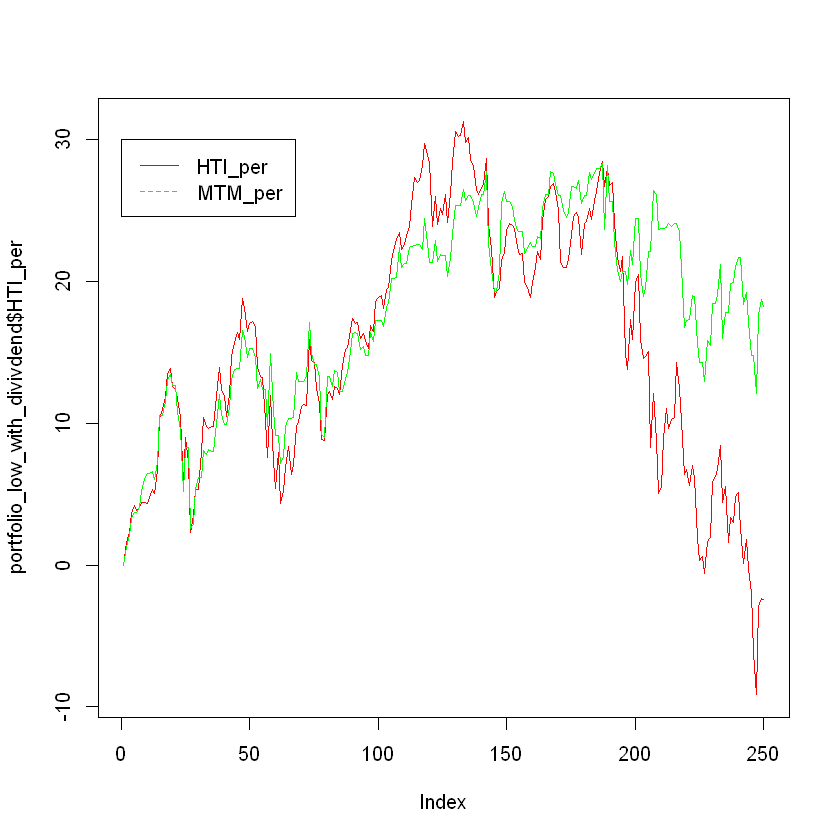

In [13]:
plot(portfolio_low_with_divivdend$HTI_per,type = 'l',col="red")   # plot HTI
lines(portfolio_low_with_divivdend$MTM_per,col="green")           # plot MTM

legend(0, 30, legend=c("HTI_per", "MTM_per"),                     # Give legend
       col=c("red", "green"), lty=1:2)

8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

In [14]:
usd_jpy = read.csv(paste(folder,sep='/','JPY=X.csv'),header=TRUE)

In [15]:
library(lubridate)                  # Library to get proper date format

portfolio_low_with_divivdend[1,'MTM_JPY']=0.0  # initialize a new column where the MTM in JPY will be stored
size = dim(portfolio_low_with_divivdend)       # Get the size 
counter = 1                                    # Counter for the portfolio dataframe

# the USD-JPY dataset has different number of rows as compared with the other stocks dataset 
# Thus we use the for loop to check and compare the dates of the stocks dataset and USD-JPY dataset

for (i in seq_len(dim(usd_jpy)[1])){            # Since USD-JPY dataset has more days 
    
    if (dmy(portfolio_low_with_divivdend[counter,'Date']) != ymd(usd_jpy[i,'Date'])){
        next
    }else{
    portfolio_low_with_divivdend[counter,'MTM_JPY'] = usd_jpy[i,"Close"]*portfolio_low_with_divivdend[counter,'MTM']
       if (is.na(portfolio_low_with_divivdend[counter,'MTM_JPY'])){
           }
    counter = counter + 1
        if (counter == size[1]+1)
            break
        }
}
print(portfolio_low_with_divivdend)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




          Date   IBM  MSFT  GOOG  AAPL  AMZN META NFLX  TSLA  ORCL   SAP
1   02-01-2018  6781 11634 18779 23220 16820    0    0     0     0     0
2   03-01-2018  6781 11634 18779 23220 16820    0    0     0     0     0
3   04-01-2018  6781 11634 18779 23220 16820    0    0     0     0     0
4   05-01-2018  6781 11634 18779 23220 16820    0    0     0     0     0
5   08-01-2018  6781 11634 18779 23220 16820    0    0     0     0     0
6   09-01-2018  6623     0     0     0 16562    0 4956 46631 21145     0
7   10-01-2018  6623     0     0     0 16562    0 4956 46631 21145     0
8   11-01-2018  6623     0     0     0 16562    0 4956 46631 21145     0
9   12-01-2018  6623     0     0     0 16562    0 4956 46631 21145     0
10  16-01-2018  6623     0     0     0 16562    0 4956 46631 21145     0
11  17-01-2018  6601     0     0 23770 16437    0 4893 45987     0     0
12  18-01-2018  6601     0     0 23770 16437    0 4893 45987     0     0
13  19-01-2018  6601     0     0 23770 16437    0 4

In [16]:
# percenatage daily change
portfolio_low_with_divivdend[,'MTM_JPY_per'] = (portfolio_low_with_divivdend[,'MTM_JPY'] - portfolio_low_with_divivdend[1,'MTM_JPY'])/portfolio_low_with_divivdend[1,'MTM_JPY']*100


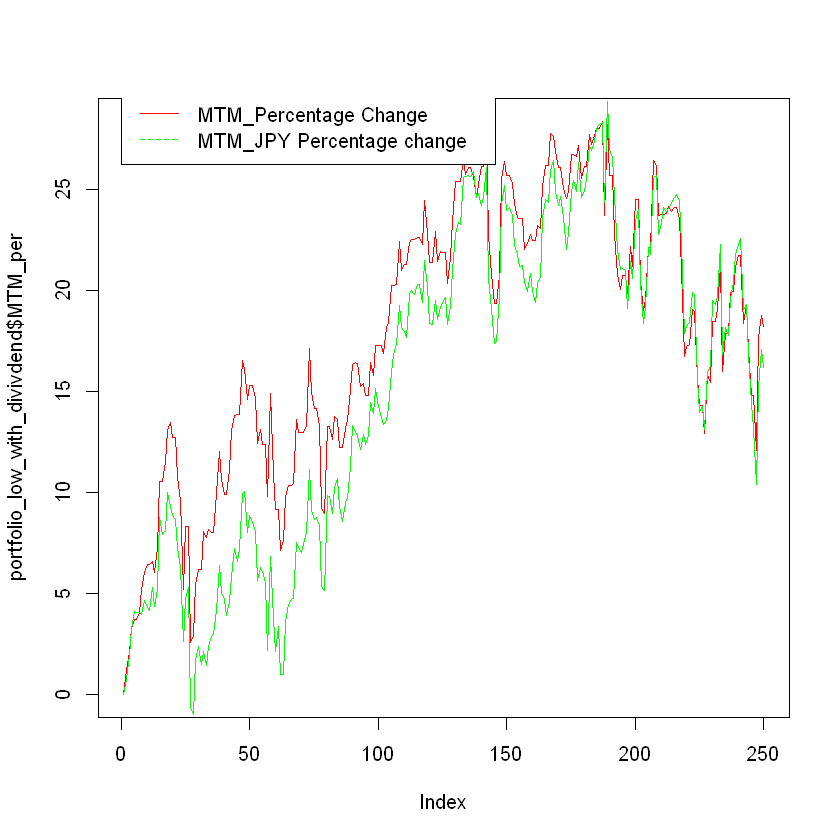

In [17]:
plot(portfolio_low_with_divivdend$MTM_per,type = 'l',col="red")   # plot MTM_per
lines(portfolio_low_with_divivdend$MTM_JPY_per,col="green")           # plot MTM_JPY_per

legend(0, 30, legend=c("MTM_Percentage Change", "MTM_JPY Percentage change"),                     # Give legend
       col=c("red", "green"), lty=1:2)

9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

In [18]:
stra = c('high','low')                # stratergy to search
int_days = 1:250                      # Interval days to search
res = data.frame()                    # Initialize the result variable

for(i in stra){                       # For loop for statergy
    for (j in int_days ){             # For loop of days interval
        
        # get the last MTM value for all the portfolios in the search range
        res[j,i] =  portfolio(data.universe = data.universe,money=5000000,statergy = i,interval = j,n_comp = 5, dividend_flag = 1,mtm_last = 1)
    }
}

[1] "The maximum MTM with statergy HIGH is 6079274.71219861 with interval of days = 13"

[1] "The maximum MTM with statergy LOW is 5910343.42891448 with interval of days = 5"

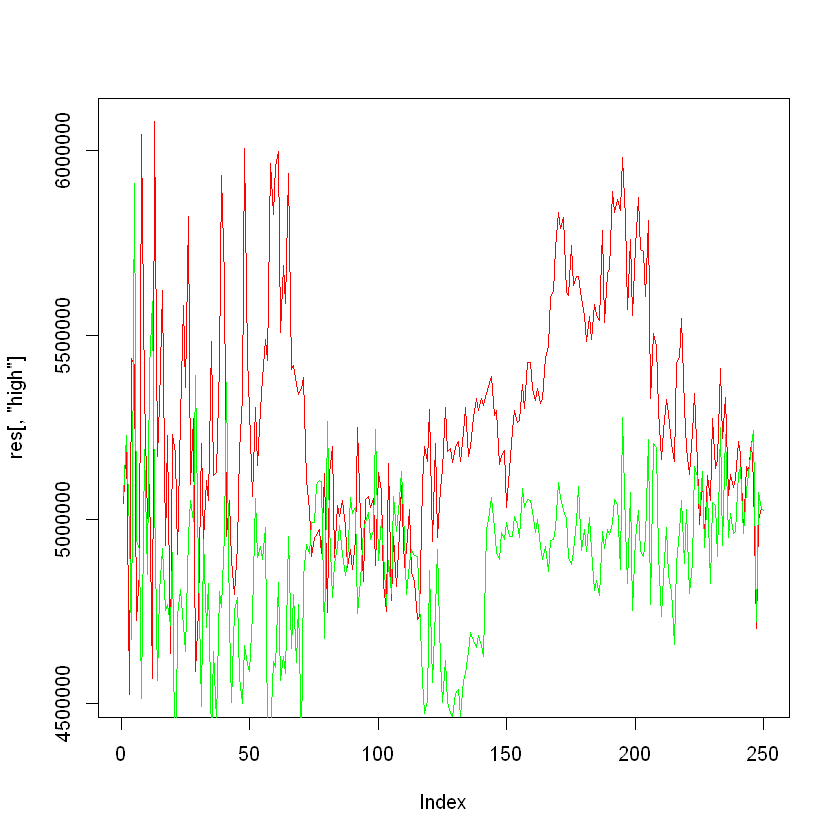

In [19]:
plot(res[,'high'],type = 'l',col="red")           # plot High
lines(res[,'low'],type='l',col="green")           # plot low

legend(0, 60, legend=c("high", "low"),                     # Give legend
       col=c("red", "green"), lty=1:2)

paste('The maximum MTM with statergy HIGH is',max(res[,'high']),'with interval of days =',which.max(res[,'high']))
paste('The maximum MTM with statergy LOW is',max(res[,'low']),'with interval of days =',which.max(res[,'low']))
